<h4>Import Libraries</h4>

In [ ]:
import pandas as pd
import numpy as np

In [18]:
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))

pandas: 0.23.0
numpy: 1.14.3


<h4>Import Dataset</h4>

In [2]:
dataset=pd.read_csv("petrol_consumption.csv")

<h4>Seprate Independent and Dependentent Columns from Dataset </h4>

In [3]:
X=dataset.iloc[:,0:4].values
y=dataset.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h4>Fitting Random Forest Regression to the Training set</h4>

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=2)
rf=rf.fit(X_train,y_train)
pred=rf.predict(X_test)

<h4>Model Evalution</h4>

In [14]:
from sklearn import metrics
print("Mean Square Error",metrics.mean_squared_error(y_test,pred))
print("Roor mean Square Error",np.sqrt(metrics.mean_squared_error(y_test,pred)))


Mean Square Error 3752.8832500000003
Roor mean Square Error 61.2607806838927


<h4>Display tree </h4>

In [21]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


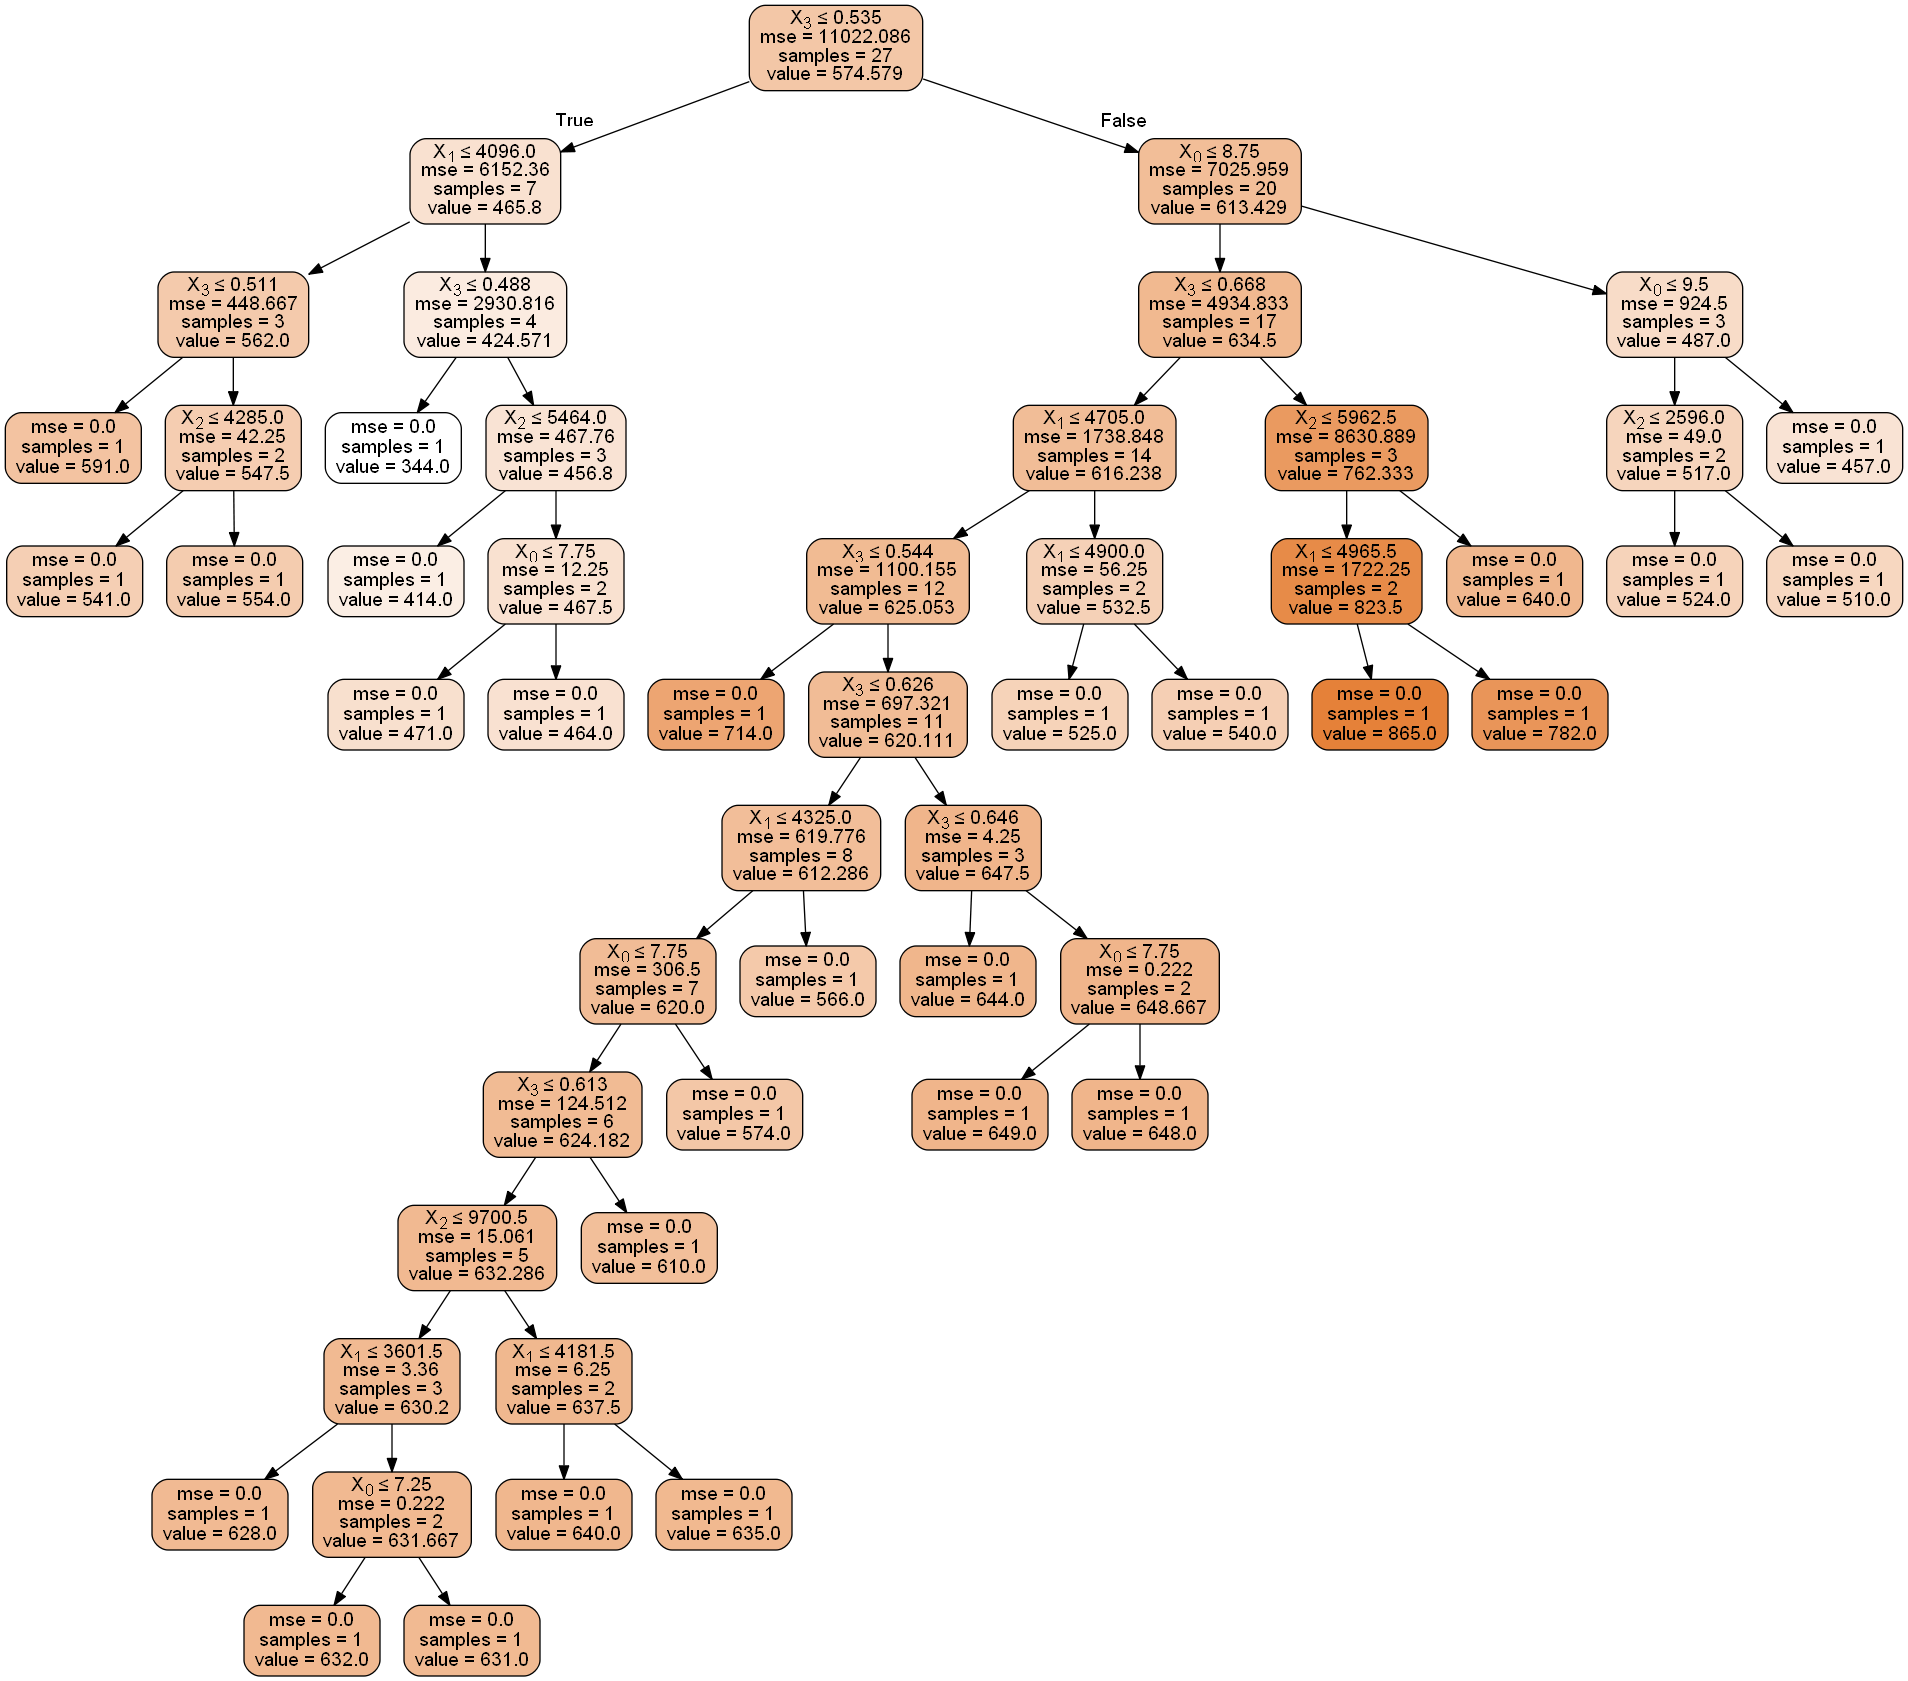

In [23]:
dot_data = StringIO()
export_graphviz(rf.estimators_[5], out_file=dot_data, 
                
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())